# Importing some neccesory tools to work with

In [75]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### To show all the rows in the dataset


In [20]:
pd.set_option('display.max_rows', None)

In [16]:
pre_match_info = pd.read_csv("../Datasets/pre_match_information.csv")

In [21]:
pre_match_info.sample(100)

,matchid,hometeamname,awayteamname,ishometeam,isawayteam,isstaff,country,id,officialname,officialsurname,jerseyname,shortname,goalscored,cleansheet,matchplayed,suspendedifbooked,role
967,2024484,England,Germany,False,True,False,Germany,250062174,Christian,Günter,Günter,Günter,0.0,NaN,Günter,False,Defender
1778,2024489,Italy,Spain,False,True,True,Spain,150130046,Oscar,Luis Celada,NaN,NaN,NaN,NaN,NaN,NaN,DOC
1563,2024455,Hungary,Portugal,False,True,True,Portugal,800409,Ilídio Fernando,Torres Vale,NaN,NaN,NaN,NaN,NaN,NaN,ACO
3042,2024485,Switzerland,Spain,True,False,True,Switzerland,279571,Vladimir,Petkovic,NaN,NaN,NaN,NaN,NaN,NaN,CO
2847,2024474,Sweden,Poland,True,False,True,NaN,250061640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PH
3218,2024447,Turkey,Italy,False,True,False,Italy,250090398,Federico,Chiesa,Chiesa,Chiesa,0.0,NaN,Chiesa,False,Midfield
1055,2024461,England,Scotland,False,True,True,Republic of Ireland,250096844,Shayne,Murphy,NaN,NaN,NaN,NaN,NaN,NaN,EXSCI
2074,2024480,Netherlands,Czech Republic,False,True,True,Czech Republic,250081986,Petr,Krejcí,NaN,NaN,NaN,NaN,NaN,NaN,DOC
1487,2024465,Hungary,France,False,True,False,France,250088023,Léo,Dubois,Dubois,Dubois,0.0,NaN,Dubois,False,Defender
1287,2024481,France,Switzerland,True,False,False,France,250020851,Olivier,Giroud,Giroud,Giroud,0.0,NaN,Giroud,False,Forward


In [4]:
pre_match_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3667 entries, 0 to 3666
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   matchid            3667 non-null   int64  
 1   hometeamname       3667 non-null   object 
 2   awayteamname       3667 non-null   object 
 3   ishometeam         3667 non-null   bool   
 4   isawayteam         3667 non-null   bool   
 5   isstaff            3667 non-null   bool   
 6   country            3469 non-null   object 
 7   id                 3667 non-null   int64  
 8   officialname       3275 non-null   object 
 9   officialsurname    3537 non-null   object 
 10  jerseyname         2648 non-null   object 
 11  shortname          2648 non-null   object 
 12  goalscored         2331 non-null   float64
 13  cleansheet         317 non-null    float64
 14  matchplayed        2648 non-null   object 
 15  suspendedifbooked  2648 non-null   object 
 16  role               3667 

In [5]:
pre_match_info.describe()

,matchid,id,goalscored,cleansheet
count,3.667000e+03,3.667000e+03,2331.000000,317.000000
mean,2.024466e+06,1.873084e+08,0.111111,0.258675
std,1.465699e+01,1.062253e+08,0.438600,0.730850
min,2.024441e+06,1.050000e+02,0.000000,0.000000
25%,2.024453e+06,1.501361e+08,0.000000,0.000000
50%,2.024466e+06,2.500504e+08,0.000000,0.000000
75%,2.024478e+06,2.500806e+08,0.000000,0.000000
max,2.024491e+06,2.501560e+08,5.000000,5.000000


# Handling Missing Values

In [59]:
pre_match_info.isnull().sum()

matchid                0
hometeamname           0
awayteamname           0
ishometeam             0
isawayteam             0
isstaff                0
country                0
id                     0
officialname         130
officialsurname      130
jerseyname           130
shortname            130
goalscored             0
cleansheet             0
matchplayed          130
suspendedifbooked      0
role                   0
dtype: int64

In [28]:
pre_match_info['country'] = pre_match_info['country'].fillna('Unknown')

#### Editing the name columns

In [82]:
def extract_surname(full_name):
    if pd.notnull(full_name):
        return full_name.split()[-1]
    return None

#### Filling missing values in "officialsurname" based on "officialname"
#### Filling missing values in "officialname" based on "officialsurname"
#### Filling missing values in "shortname" based on "officialsurname"

In [83]:
pre_match_info['officialsurname'] = pre_match_info.apply(lambda row: extract_surname(row['officialname']) if pd.isnull(row['officialsurname']) else row['officialsurname'], axis=1)

In [84]:
pre_match_info['officialname'] = pre_match_info.apply(lambda row: row['officialsurname'] if pd.isnull(row['officialname']) and pd.notnull(row['officialsurname']) else row['officialname'], axis=1)

In [38]:
pre_match_info['shortname'] = pre_match_info.apply(lambda row: row['officialsurname'] if pd.isnull(row['shortname']) and pd.notnull(row['officialsurname']) else row['shortname'], axis=1)

In [85]:
pre_match_info['jerseyname'] = pre_match_info.apply(lambda row: row['officialsurname'] if pd.isnull(row['jerseyname']) and pd.notnull(row['officialsurname']) else row['jerseyname'], axis=1)

In [86]:
pre_match_info['goalscored'] = pre_match_info['goalscored'].fillna(0)

In [87]:
pre_match_info['cleansheet'] = pre_match_info['cleansheet'].fillna(0)

In [88]:
pre_match_info['suspendedifbooked'] = pre_match_info['suspendedifbooked'].fillna(False)

In [58]:
pre_match_info=pre_match_info.drop(index=1)

In [7]:
pre_match_info['goalscored'].fillna(0, inplace=True)
pre_match_info['goalscored'] = pre_match_info['goalscored'].astype(int)

In [89]:
pre_match_info['matchplayed'] = pre_match_info.apply(lambda row: row['officialname'] if pd.isnull(row['matchplayed']) and pd.notnull(row['officialname']) else row['matchplayed'], axis=1)

In [8]:
pre_match_info['country'] = pre_match_info.apply(lambda x: x['hometeamname'] if x['ishometeam'] else x['awayteamname'], axis=1)

# EDA

### Top Goal Scorers

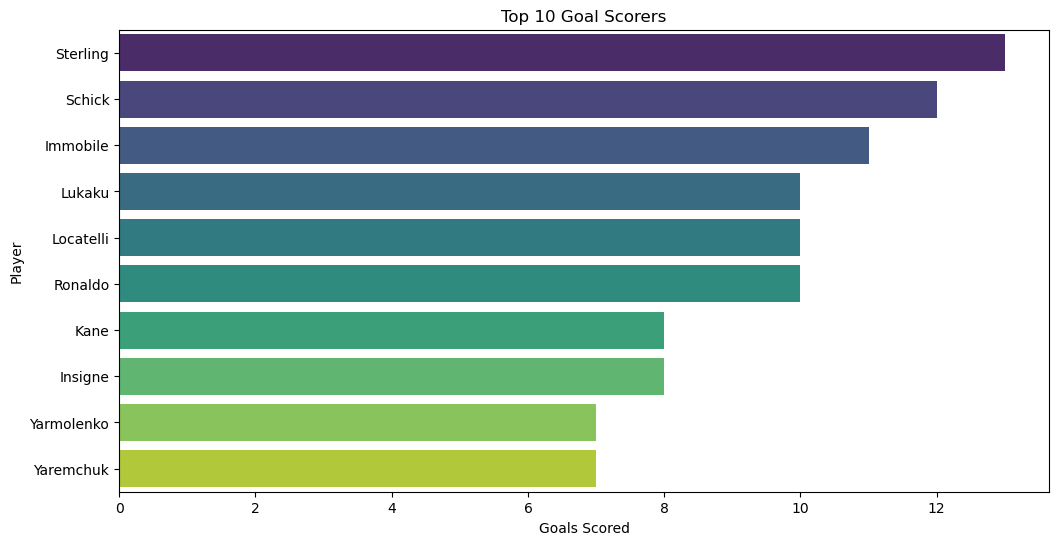

In [9]:
top_scorers = pre_match_info[pre_match_info['goalscored'] > 0].groupby('officialsurname')['goalscored'].sum().reset_index().sort_values(by='goalscored', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_scorers, x='goalscored', y='officialsurname', palette='viridis')
plt.title('Top 10 Goal Scorers')
plt.xlabel('Goals Scored')
plt.ylabel('Player')
plt.show()

### Top Countries by Goals Scored

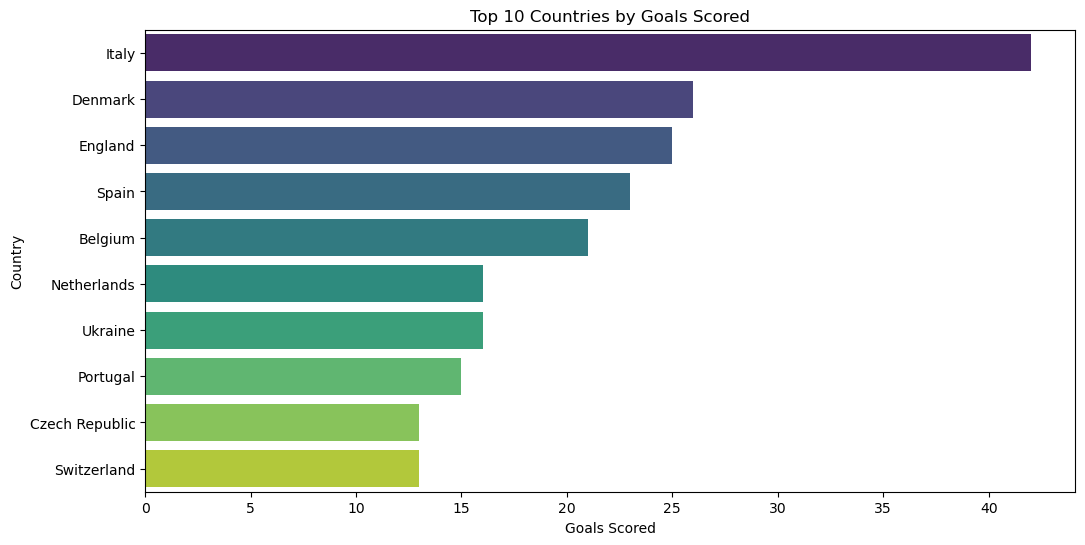

In [10]:
country_performance = pre_match_info.groupby('country')['goalscored'].sum().reset_index().sort_values(by='goalscored', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=country_performance, x='goalscored', y='country', palette='viridis')
plt.title('Top 10 Countries by Goals Scored')
plt.xlabel('Goals Scored')
plt.ylabel('Country')
plt.show()

### Goals Scored by Player Roles

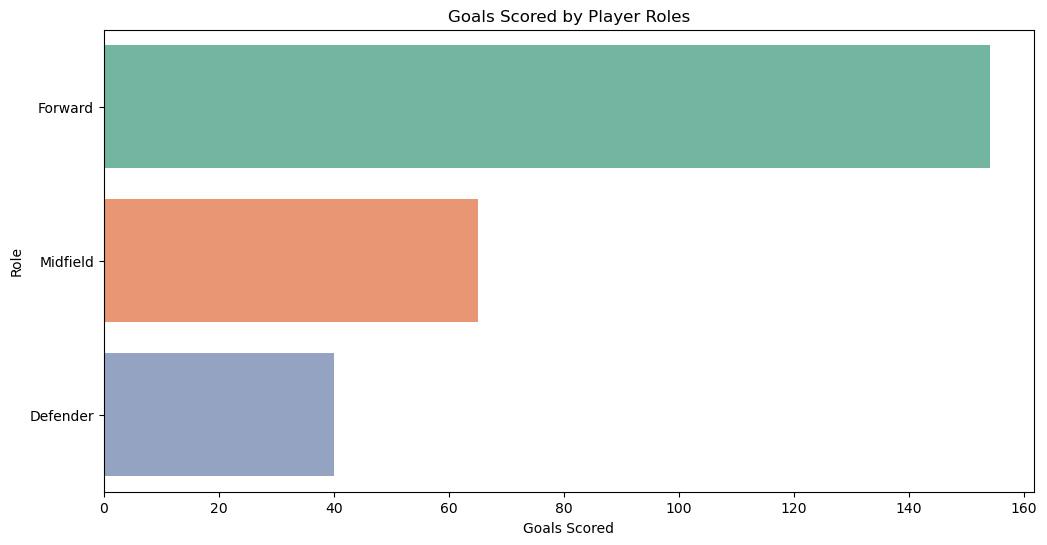

In [11]:
goal_by_role = pre_match_info[pre_match_info['goalscored'] > 0].groupby('role')['goalscored'].sum().reset_index().sort_values('goalscored', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=goal_by_role, x='goalscored', y='role', palette='Set2')
plt.title('Goals Scored by Player Roles')
plt.xlabel('Goals Scored')
plt.ylabel('Role')
plt.show()

### Top Teams with Players at Risk of Suspension

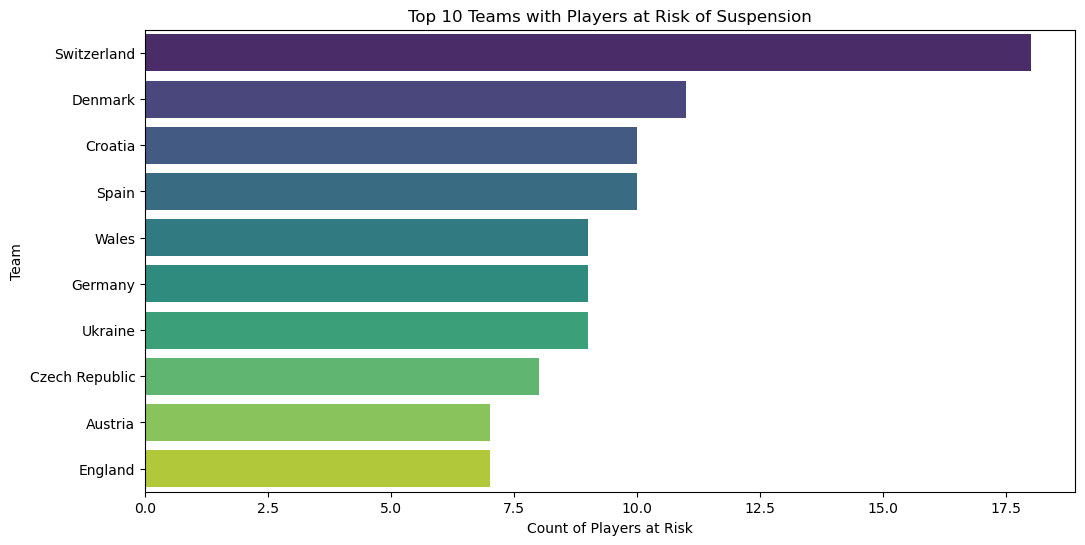

In [12]:
teams_at_risk = pre_match_info[pre_match_info['suspendedifbooked'] == True].groupby('country').size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=teams_at_risk, x='count', y='country', palette='viridis')
plt.title('Top 10 Teams with Players at Risk of Suspension')
plt.xlabel('Count of Players at Risk')
plt.ylabel('Team')
plt.show()

### Top  PLayers at Risk of Suspension

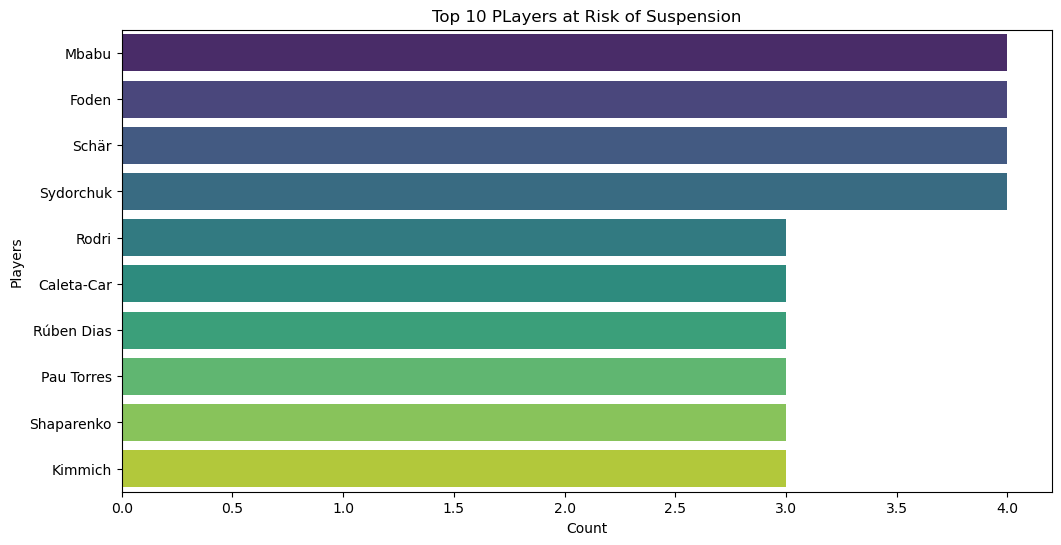

In [13]:
players_at_risk = pre_match_info[pre_match_info['suspendedifbooked'] == True].groupby('officialsurname').size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=players_at_risk, x='count', y='officialsurname', palette='viridis')
plt.title('Top 10 PLayers at Risk of Suspension')
plt.xlabel('Count')
plt.ylabel('Players')
plt.show()

#### Distribution of Top  Player-Roles

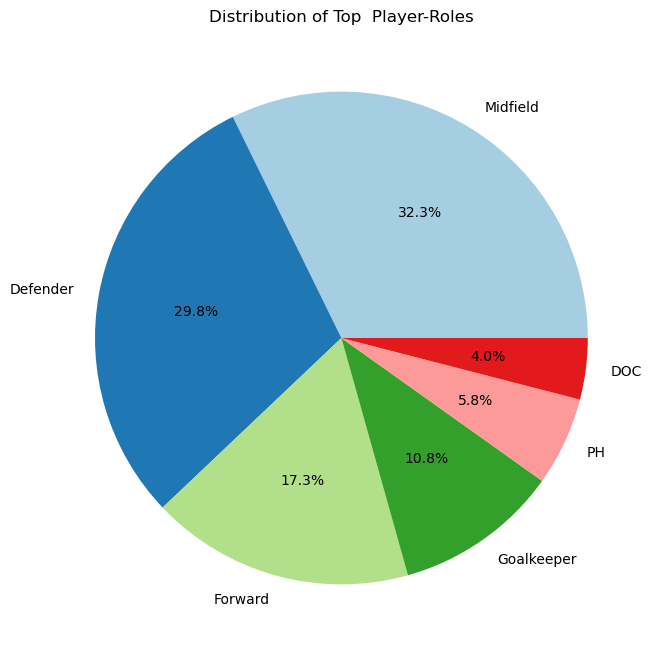

In [69]:

role_distribution = pre_match_info['role'].value_counts().nlargest(6)

plt.figure(figsize=(8, 8))
role_distribution.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired(range(len(role_distribution))))
plt.title('Distribution of Top  Player-Roles')
plt.ylabel('')  
plt.show()


### Number of Matches Between Teams

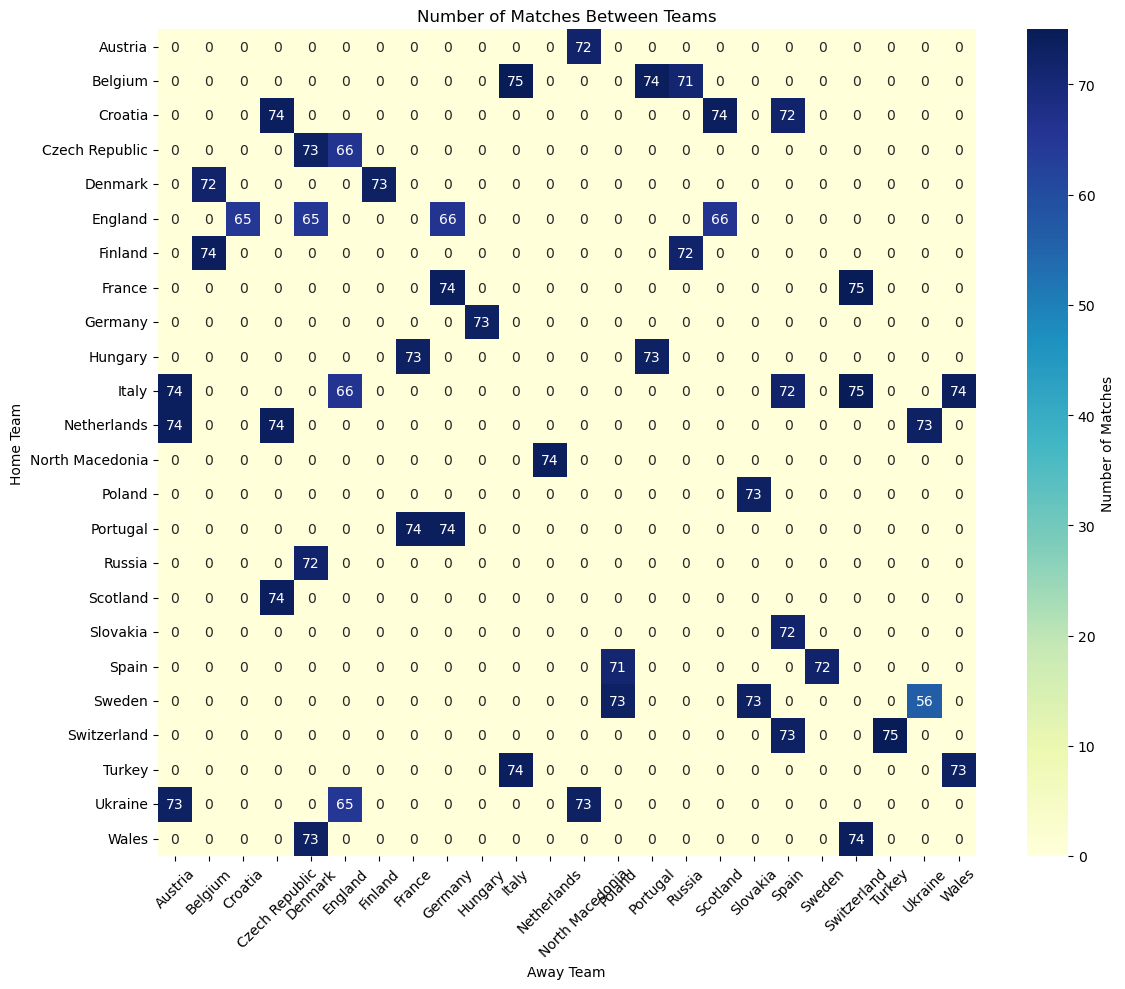

In [71]:
match_counts = pre_match_info.groupby(['hometeamname', 'awayteamname']).size().reset_index(name='count')

pivot_table = match_counts.pivot(index='hometeamname', columns='awayteamname', values='count').fillna(0)
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Number of Matches'})
plt.title('Number of Matches Between Teams')
plt.xlabel('Away Team')
plt.ylabel('Home Team')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Number of Matches Played by Country (Home vs Away)

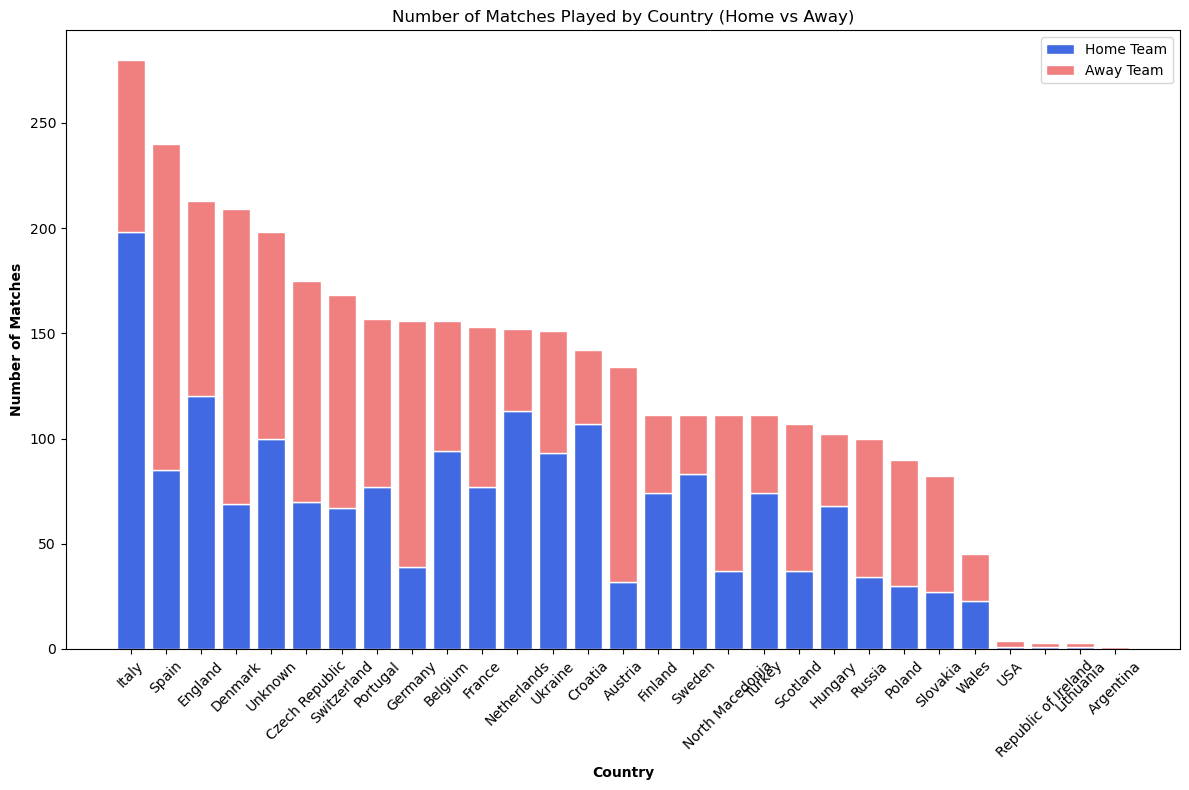

In [76]:
matches_by_country = pre_match_info.groupby('country')[['ishometeam', 'isawayteam']].sum().reset_index()

# Sort countries by total matches played
matches_by_country['total_matches'] = matches_by_country['ishometeam'] + matches_by_country['isawayteam']
matches_by_country = matches_by_country.sort_values(by='total_matches', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))

# Create stacked bar plot
barWidth = 0.8
bars1 = matches_by_country['ishometeam']
bars2 = matches_by_country['isawayteam']
r = np.arange(len(matches_by_country))

plt.bar(r, bars1, color='royalblue', edgecolor='white', width=barWidth, label='Home Team')
plt.bar(r, bars2, bottom=bars1, color='lightcoral', edgecolor='white', width=barWidth, label='Away Team')

# Add labels, title, and legend
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Number of Matches', fontweight='bold')
plt.xticks(r, matches_by_country['country'], rotation=45)
plt.title('Number of Matches Played by Country (Home vs Away)')
plt.legend()

plt.tight_layout()
plt.show()

### Number of Entries by Role

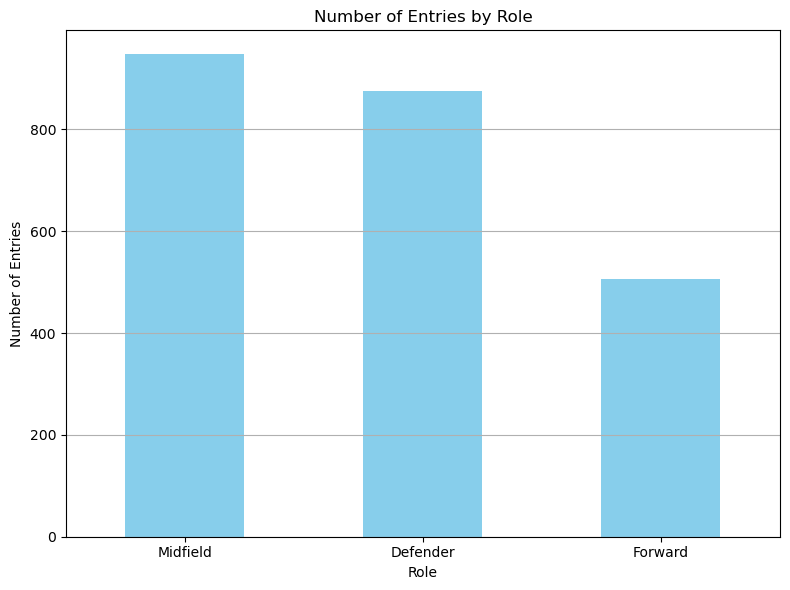

In [79]:
roles_to_include = ['Forward', 'Midfield', 'Defender']
filtered_data = pre_match_info[pre_match_info['role'].isin(roles_to_include)]

# Count occurrences of each role
role_counts = filtered_data['role'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
role_counts.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Number of Entries by Role')
plt.xlabel('Role')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### Goals Scored Distribution by Player Role

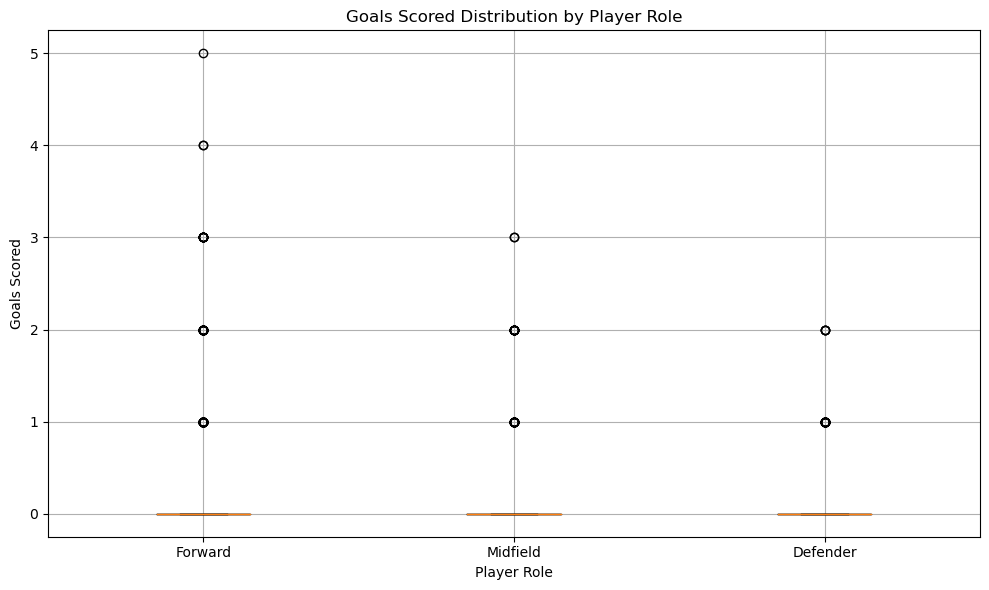

In [90]:
filtered_data = pre_match_info.dropna(subset=['goalscored'])

# Filter data for specific roles: Forward, Midfield, Defender
roles = ['Forward', 'Midfield', 'Defender']
filtered_data = filtered_data[filtered_data['role'].isin(roles)]

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([filtered_data[filtered_data['role'] == 'Forward']['goalscored'],
             filtered_data[filtered_data['role'] == 'Midfield']['goalscored'],
             filtered_data[filtered_data['role'] == 'Defender']['goalscored']],
            labels=roles)

plt.title('Goals Scored Distribution by Player Role')
plt.xlabel('Player Role')
plt.ylabel('Goals Scored')
plt.grid(True)

plt.tight_layout()
plt.show()